In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from scipy import ndimage
from skimage.transform import resize
import sys

### Examining Nutritional Value of Burger King menu items


***Introduction***

Burger King is one of the most popular fast-food chains in the world, with a wide range of menu options that appeal to different tastes and preferences. However, many people are concerned about the nutritional value of fast food and how it can impact their health. In this Jupyter notebook, we will perform a comprehensive data analysis of the Burger King menu to explore the nutritional content of its menu items. We will look at various variables such as calories, sugars, protein, trans fat, sodium, dietary fiber, etc., to gain insights into the nutritional value of the menu items.

***Hypothesis***

Our hypothesis is that the nutritional content of Burger King menu items varies significantly, and some menu items may have higher levels of calories, sugars, trans fat, and sodium than others. We expect that there will be a positive correlation between calories and sugar content, as well as between trans fat and sodium content. We also anticipate that some menu items may have higher levels of protein and dietary fiber, which are essential nutrients for a healthy diet. Through this analysis, we hope to provide valuable insights into the nutritional value of Burger King menu items and help consumers make informed choices about what they eat.




In [25]:
menu = pd.read_csv('BK-menu.csv')

In [26]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

Populating the interactive namespace from numpy and matplotlib


C:\Users\barar\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['resize']
`%matplotlib` prevents importing * from pylab and numpy

C:\Users\barar\AppData\Local\Temp\ipykernel_13488\3781973325.py:11: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Nutrition Value Correlation')

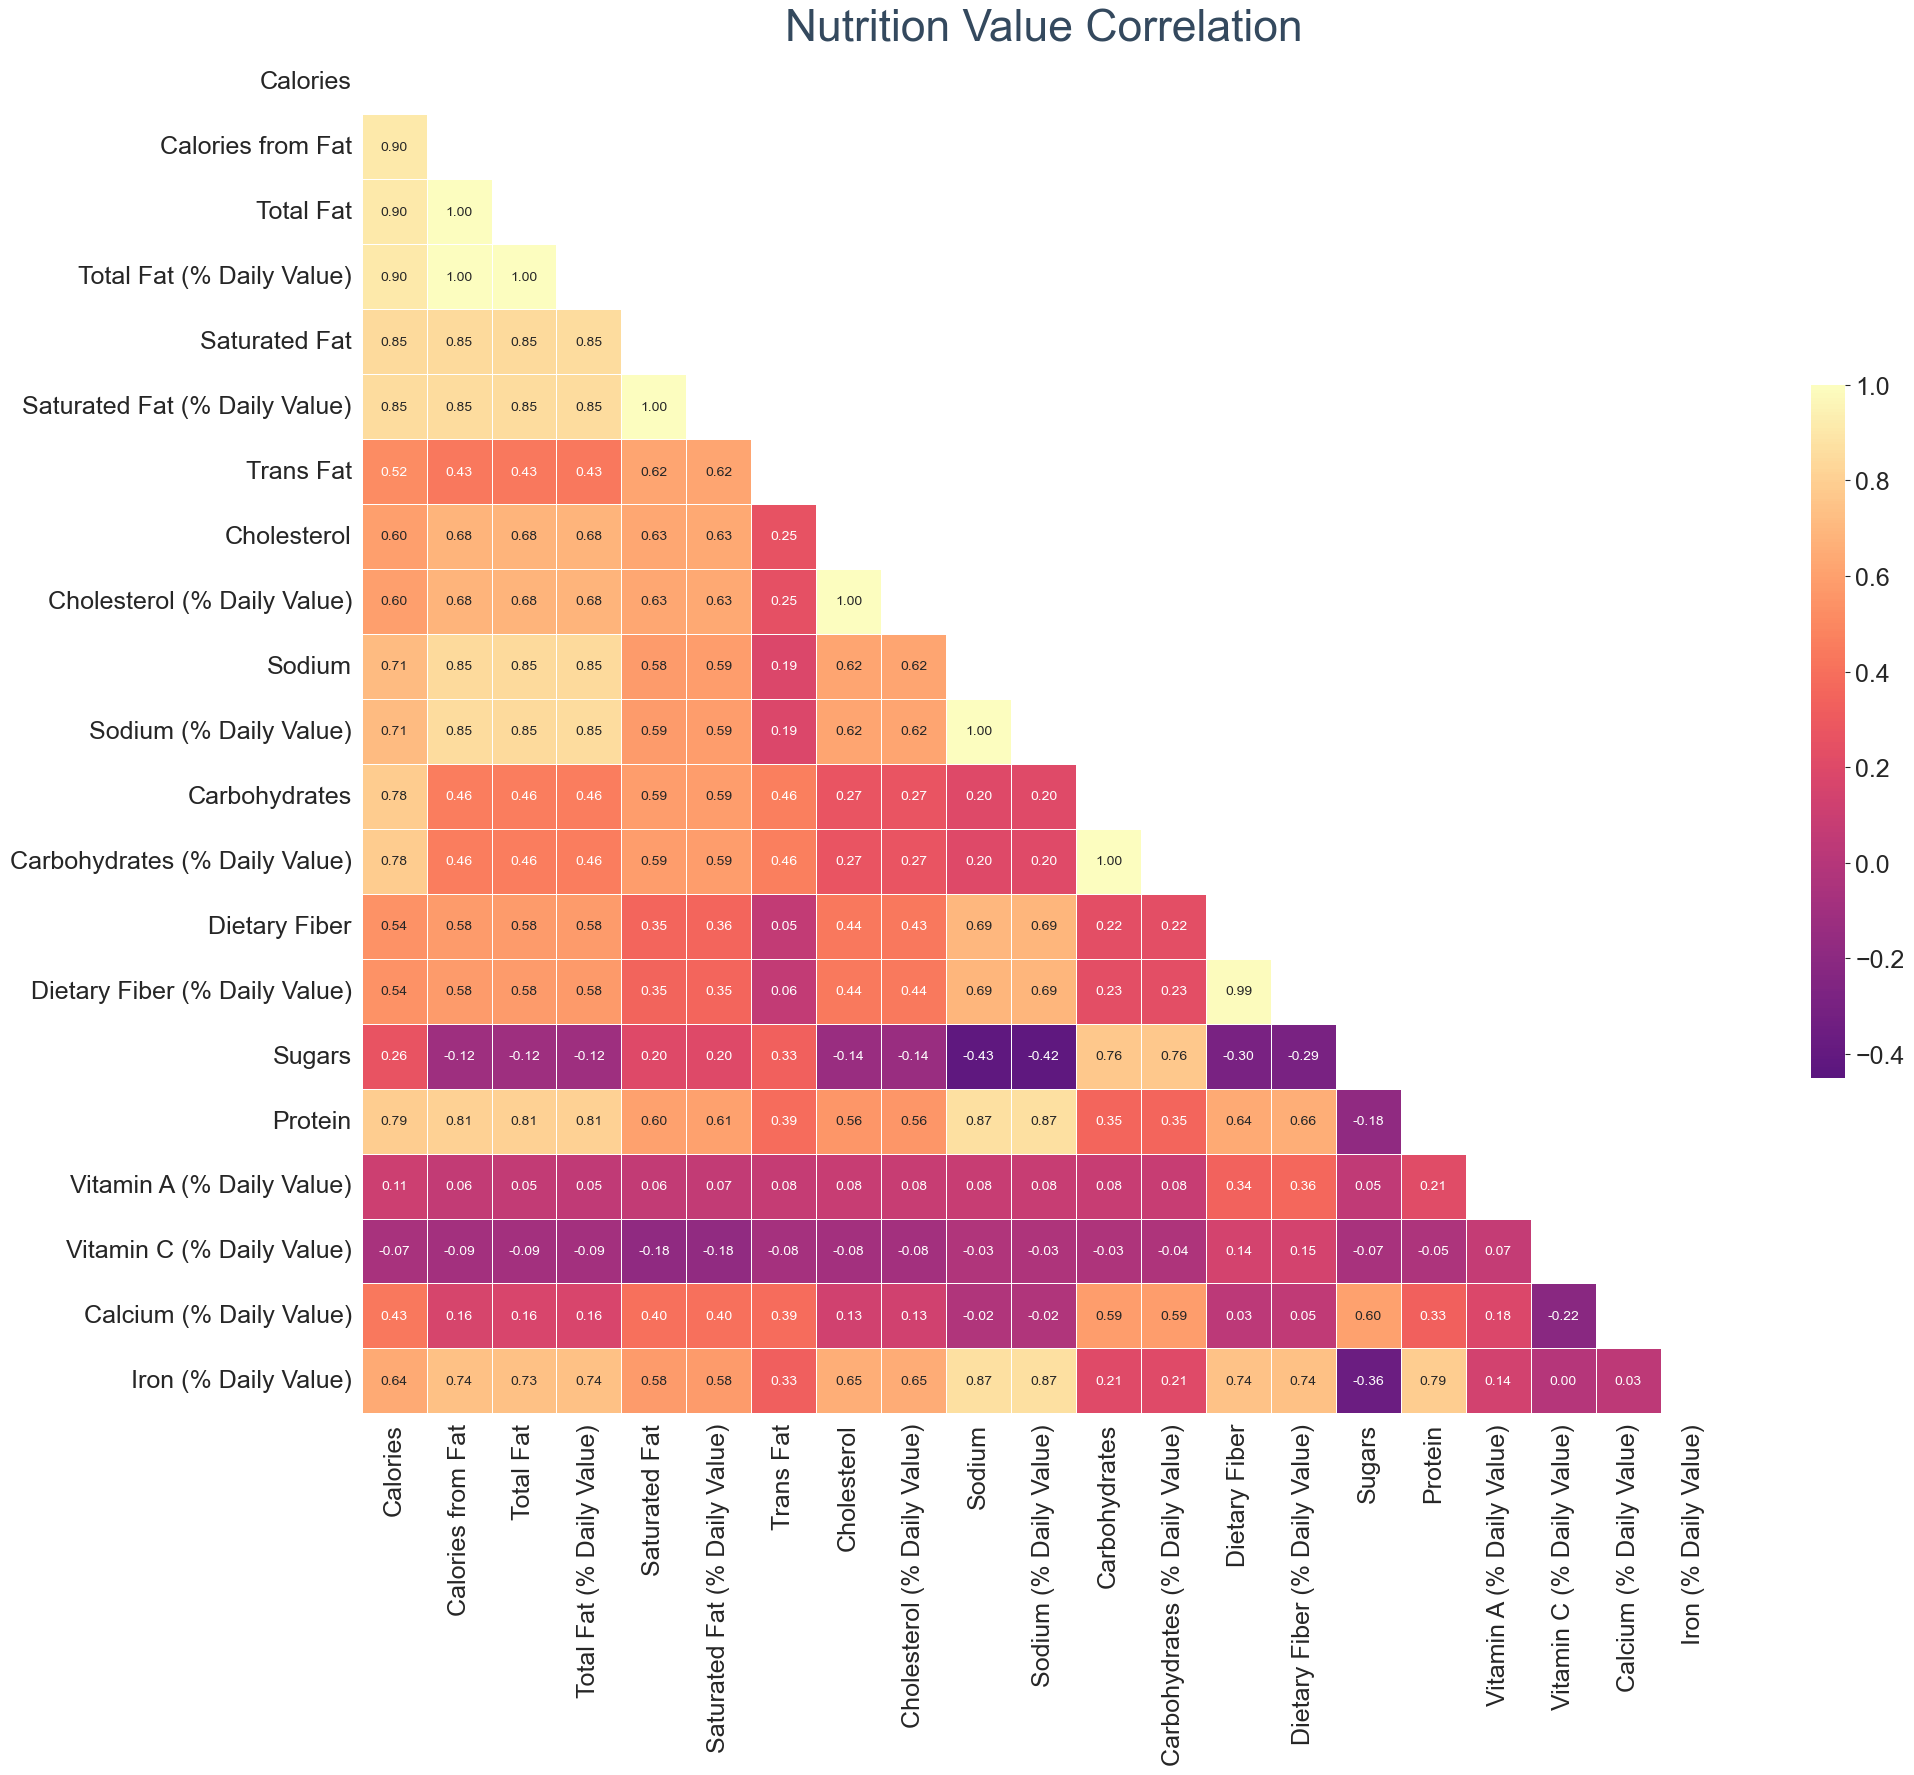

In [27]:
# Correlation Plot
from matplotlib import cm as cm

import matplotlib as mpl
%pylab inline
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

sns.set_style("whitegrid")
mask = np.zeros_like(menu[menu.columns[3:]].corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (22,18))

cmap = 'magma'  #10,133

#Draw
sns.heatmap(menu[menu.columns[3:]].corr(), mask = mask, vmax = 1, vmin = -.45, center = 0,cmap=cmap,
           annot = True, square = True, linewidth = .5, cbar_kws = {'shrink':.5}, fmt= '.2f')

plt.title("Nutrition Value Correlation", loc = 'center', size = 32, color = '#34495E')
#plt.savefig('Correlation Matrix'+'.png', bbox_inches = 'tight')

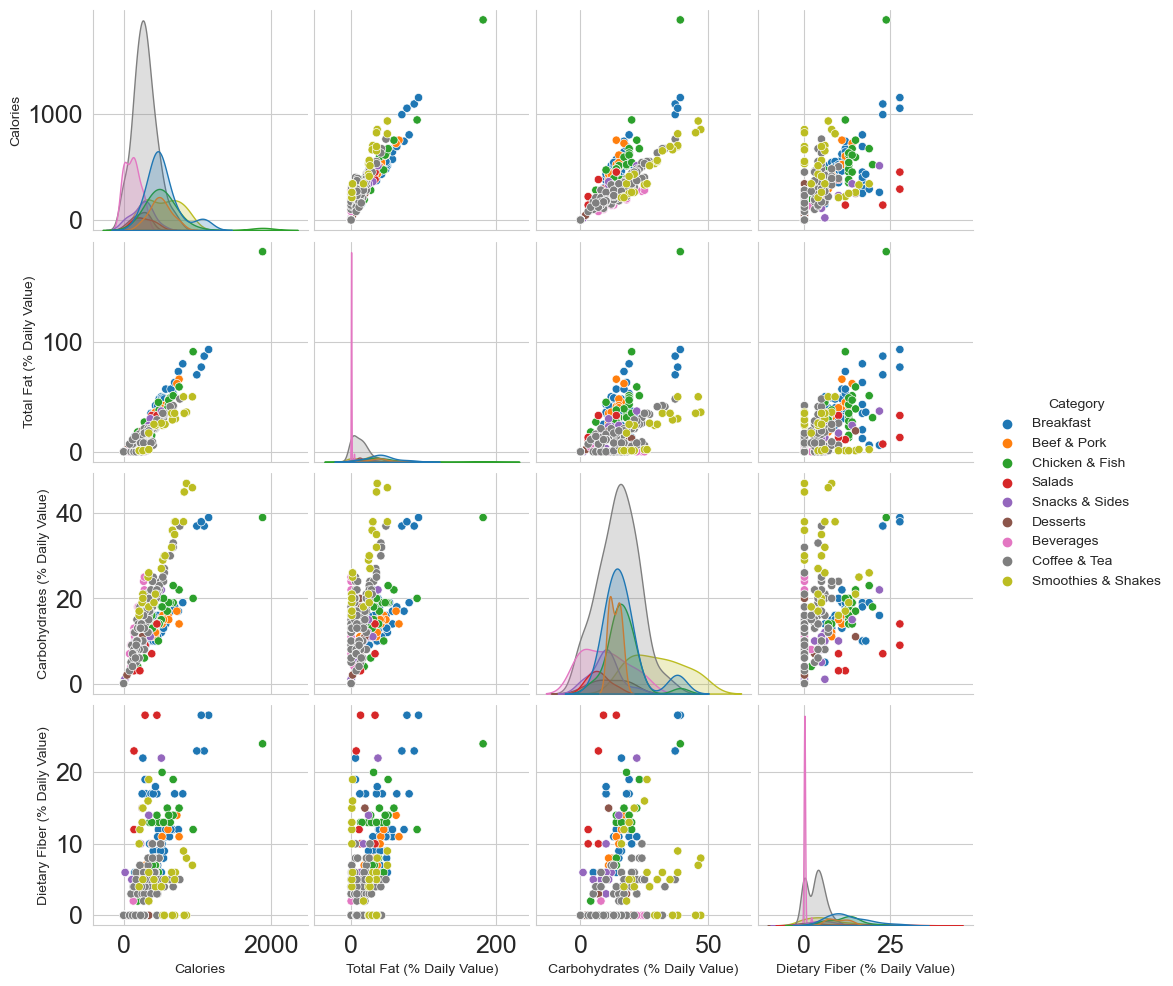

In [28]:
sns.pairplot(menu[['Category','Calories', 'Total Fat (% Daily Value)','Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)']],hue='Category')

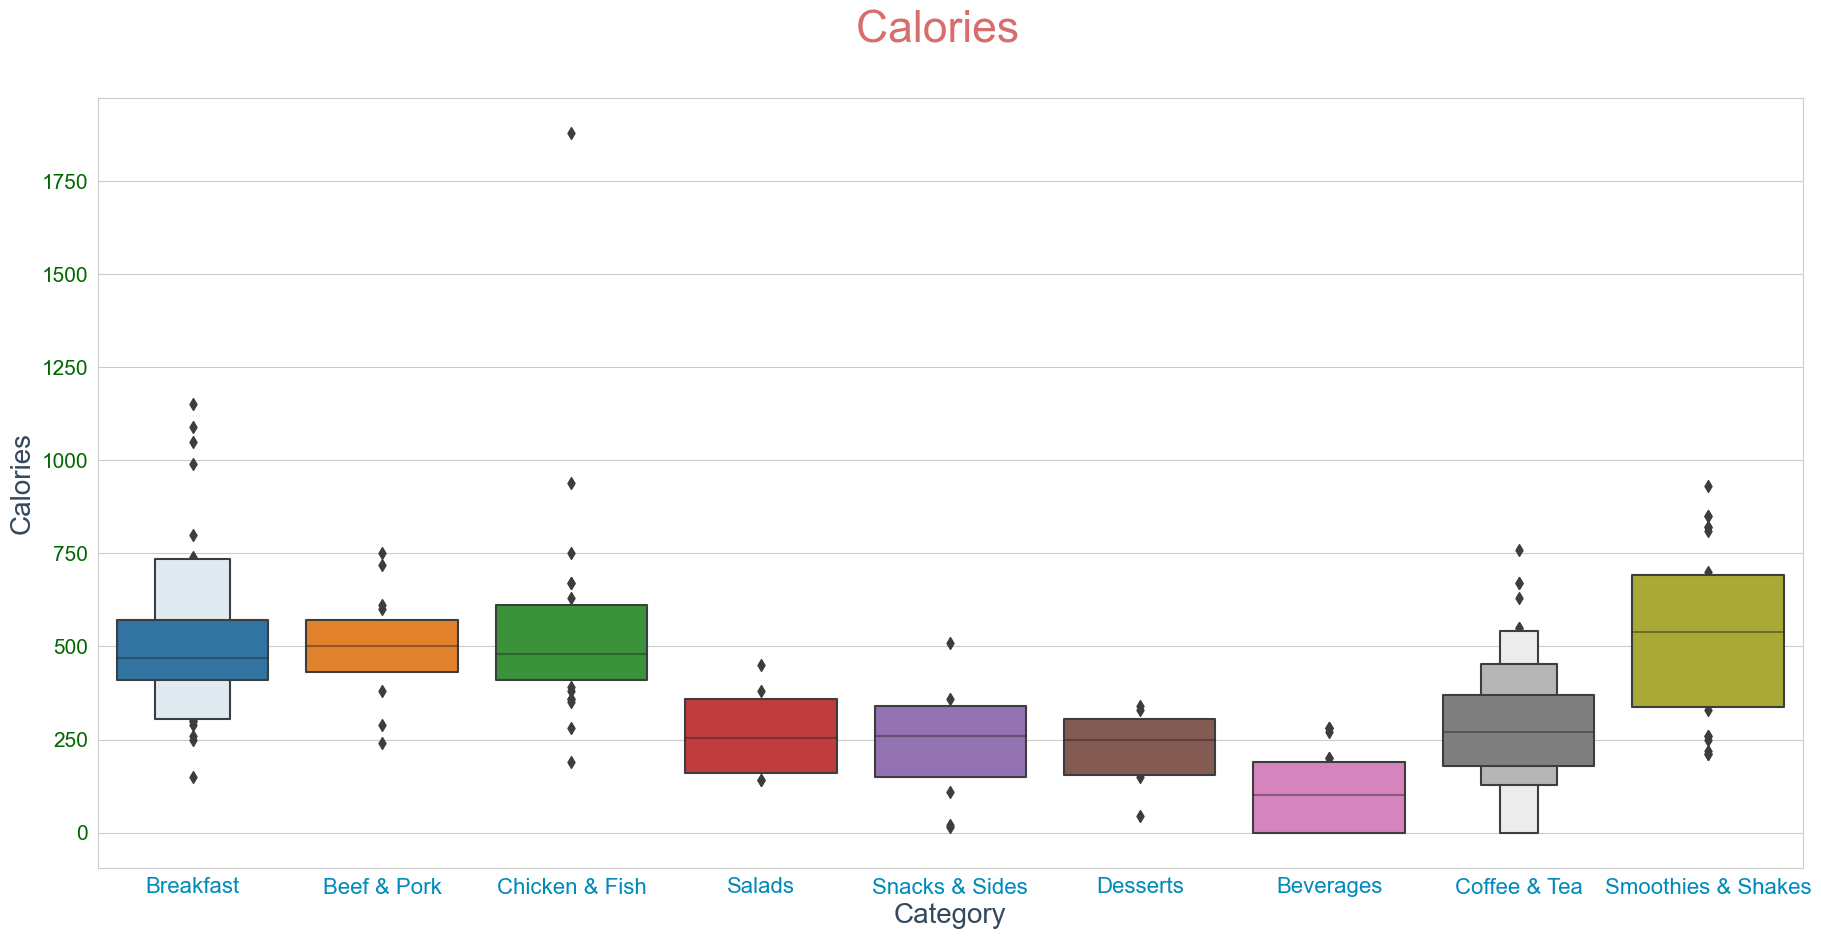

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=menu, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Calories  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Calories',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

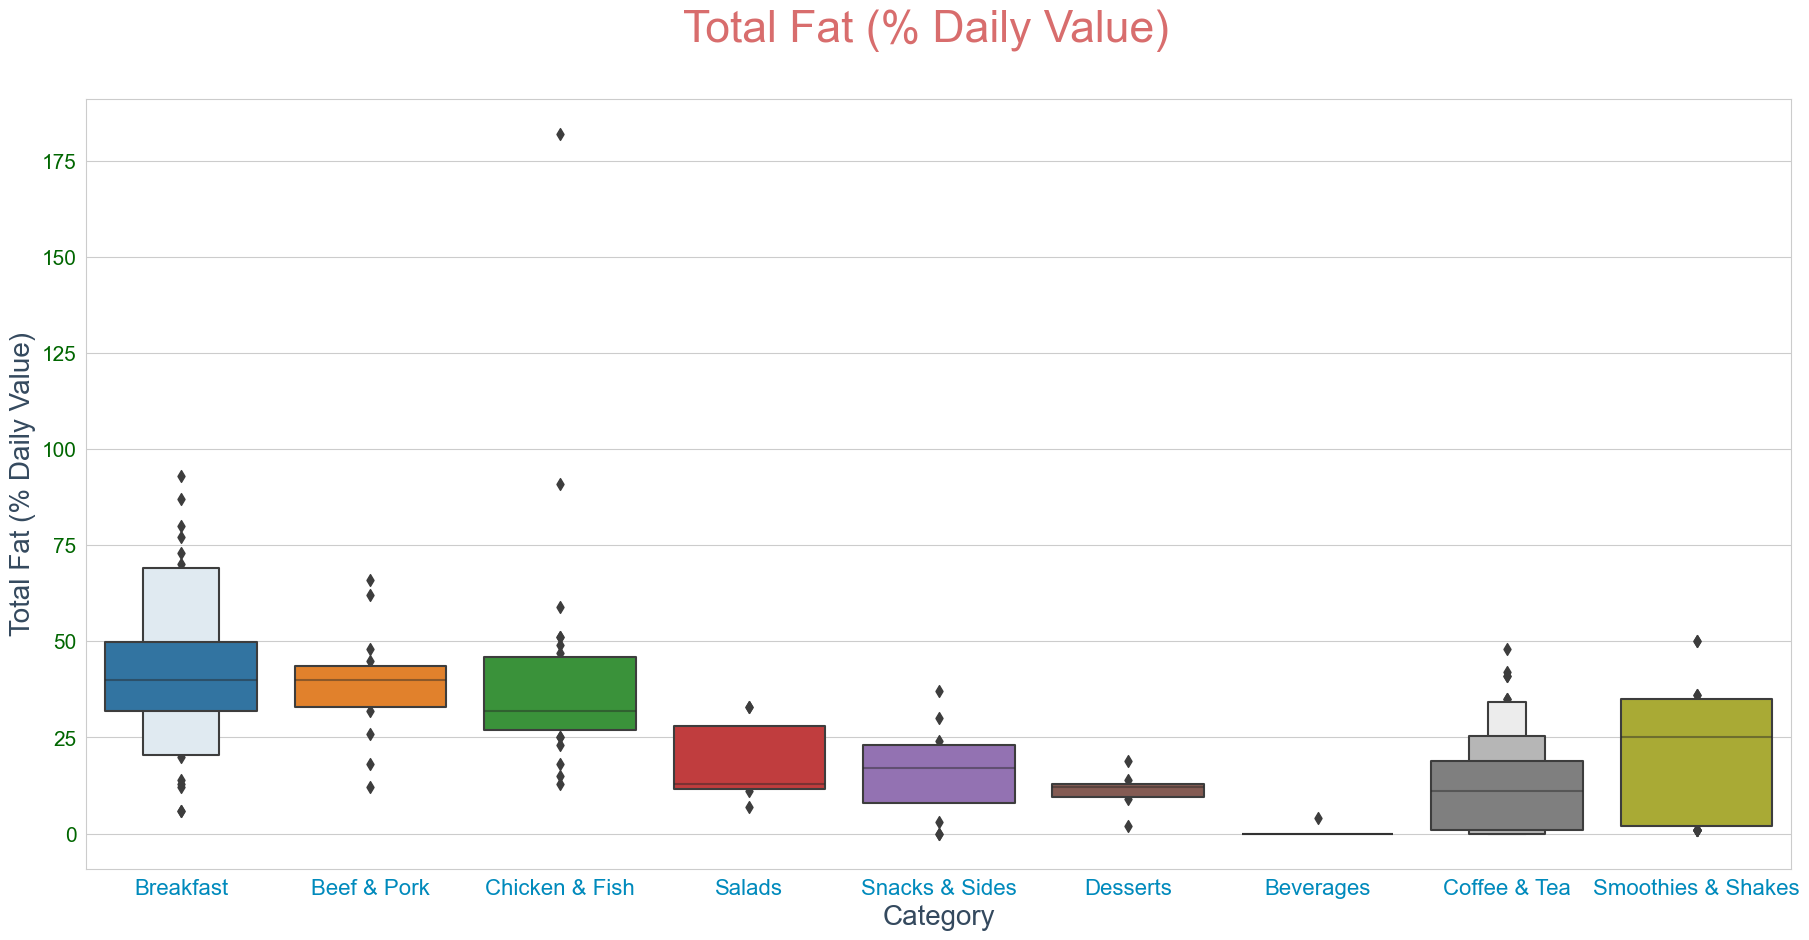

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Total Fat (% Daily Value)', data=menu, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Total Fat (% Daily Value)  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

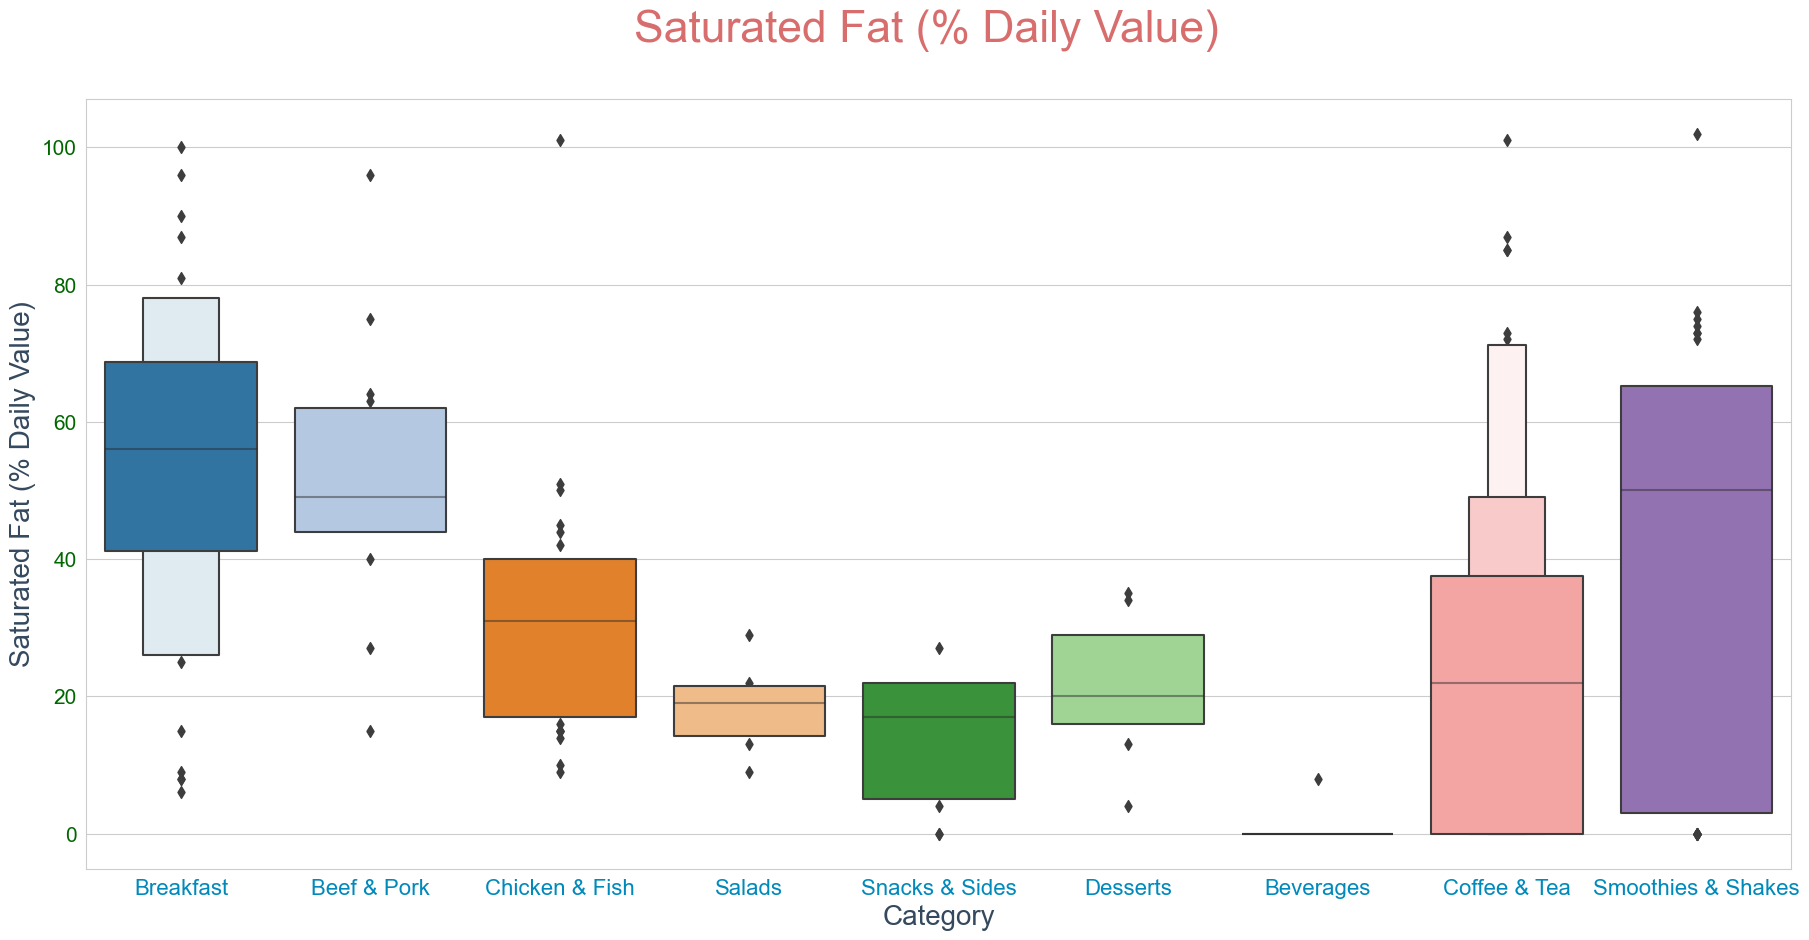

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Saturated Fat (% Daily Value)', data=menu, color='#eeeeee', palette="tab20")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Saturated Fat (% Daily Value)  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Saturated Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=10,ncol=5,title='Category',title_fontsize=14,framealpha=0.99)
plt.show()

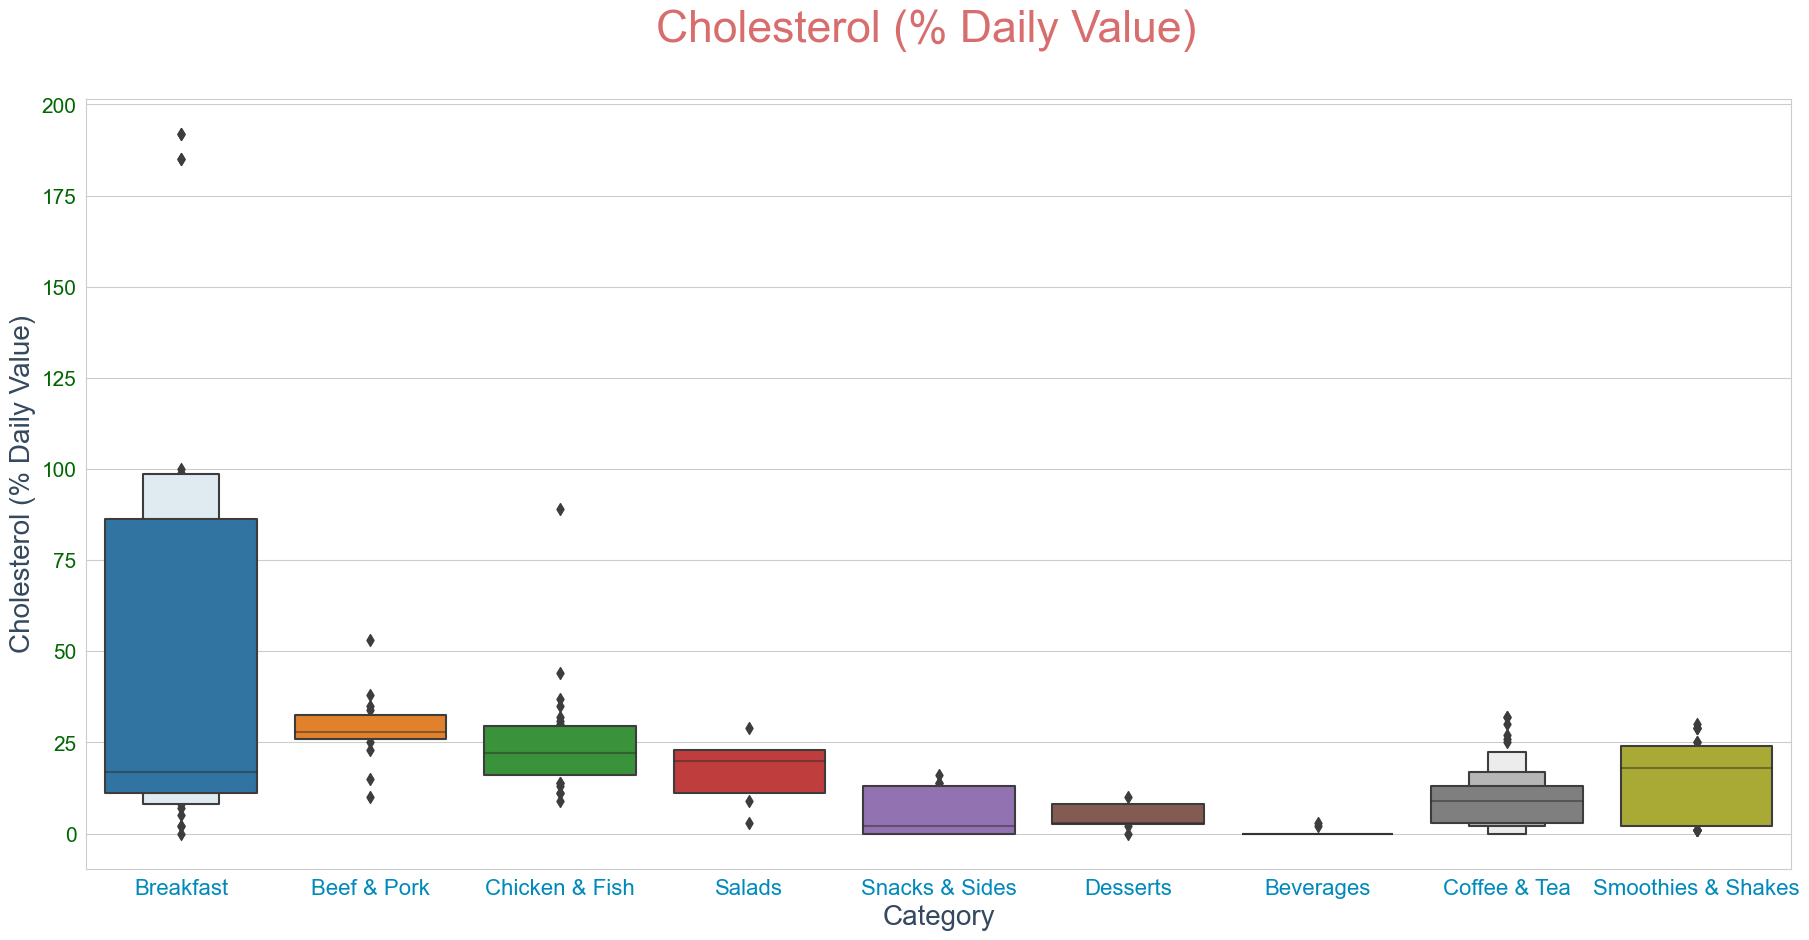

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Cholesterol (% Daily Value)', data=menu, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Cholesterol (% Daily Value)  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Cholesterol (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

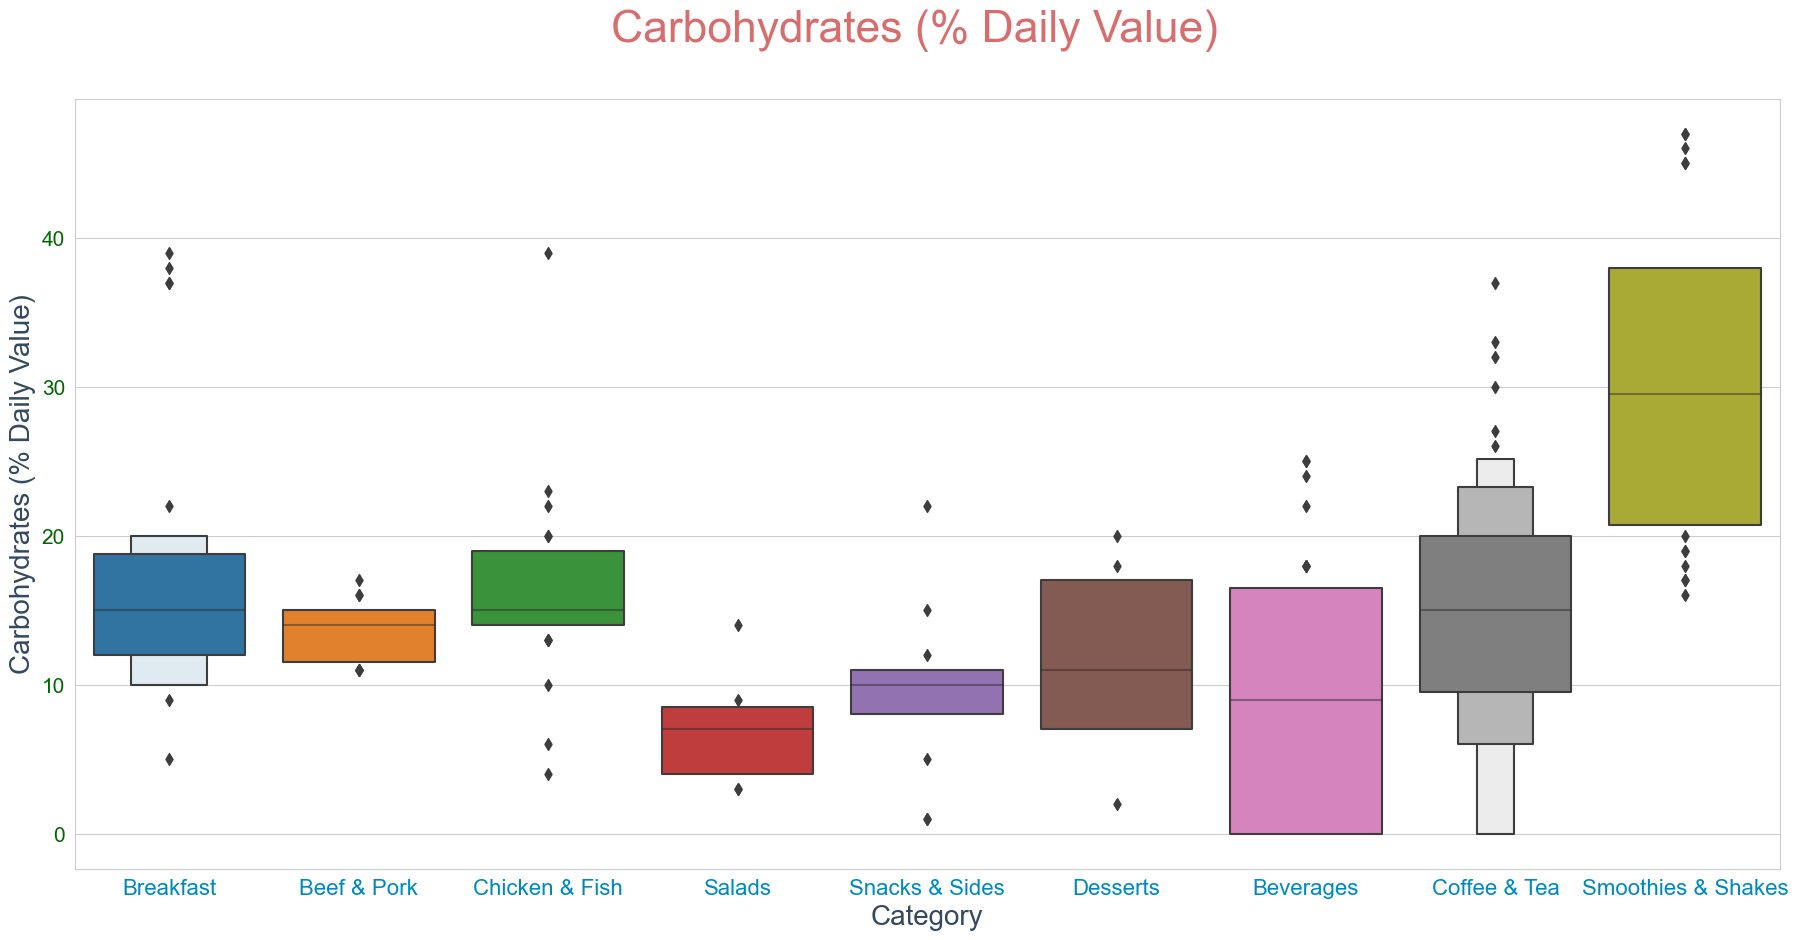

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Carbohydrates (% Daily Value)', data=menu, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Carbohydrates (% Daily Value)  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Carbohydrates (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

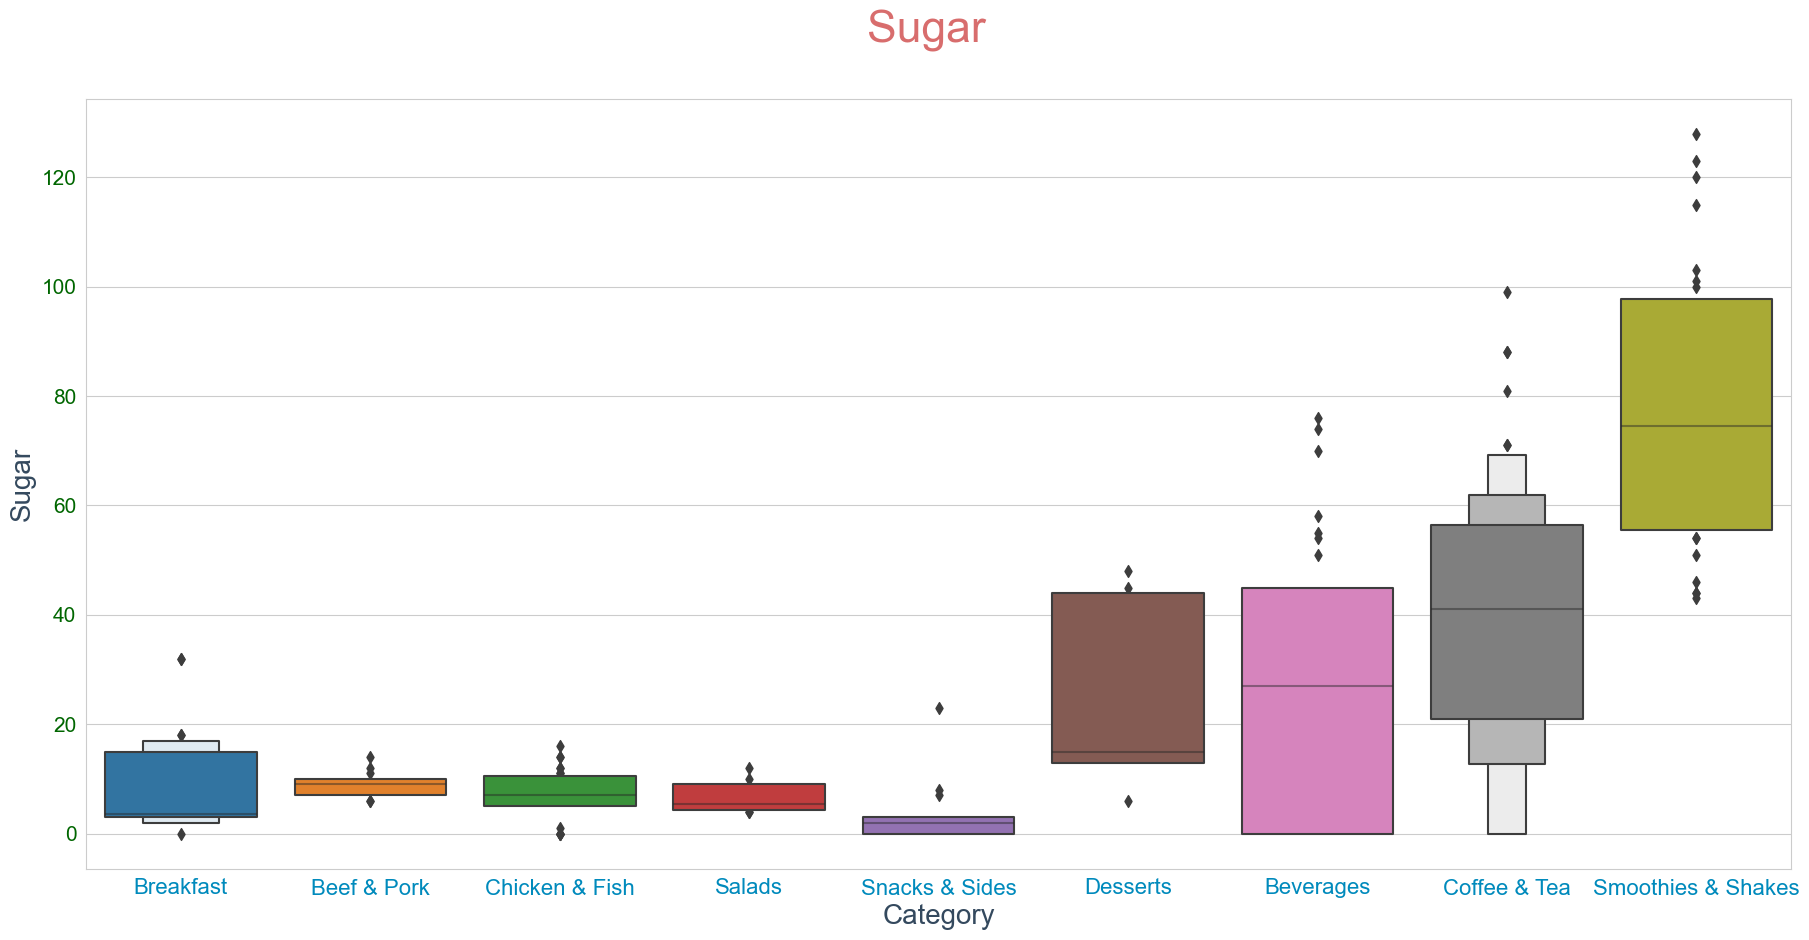

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Sugars', data=menu, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Sugar  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sugar',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

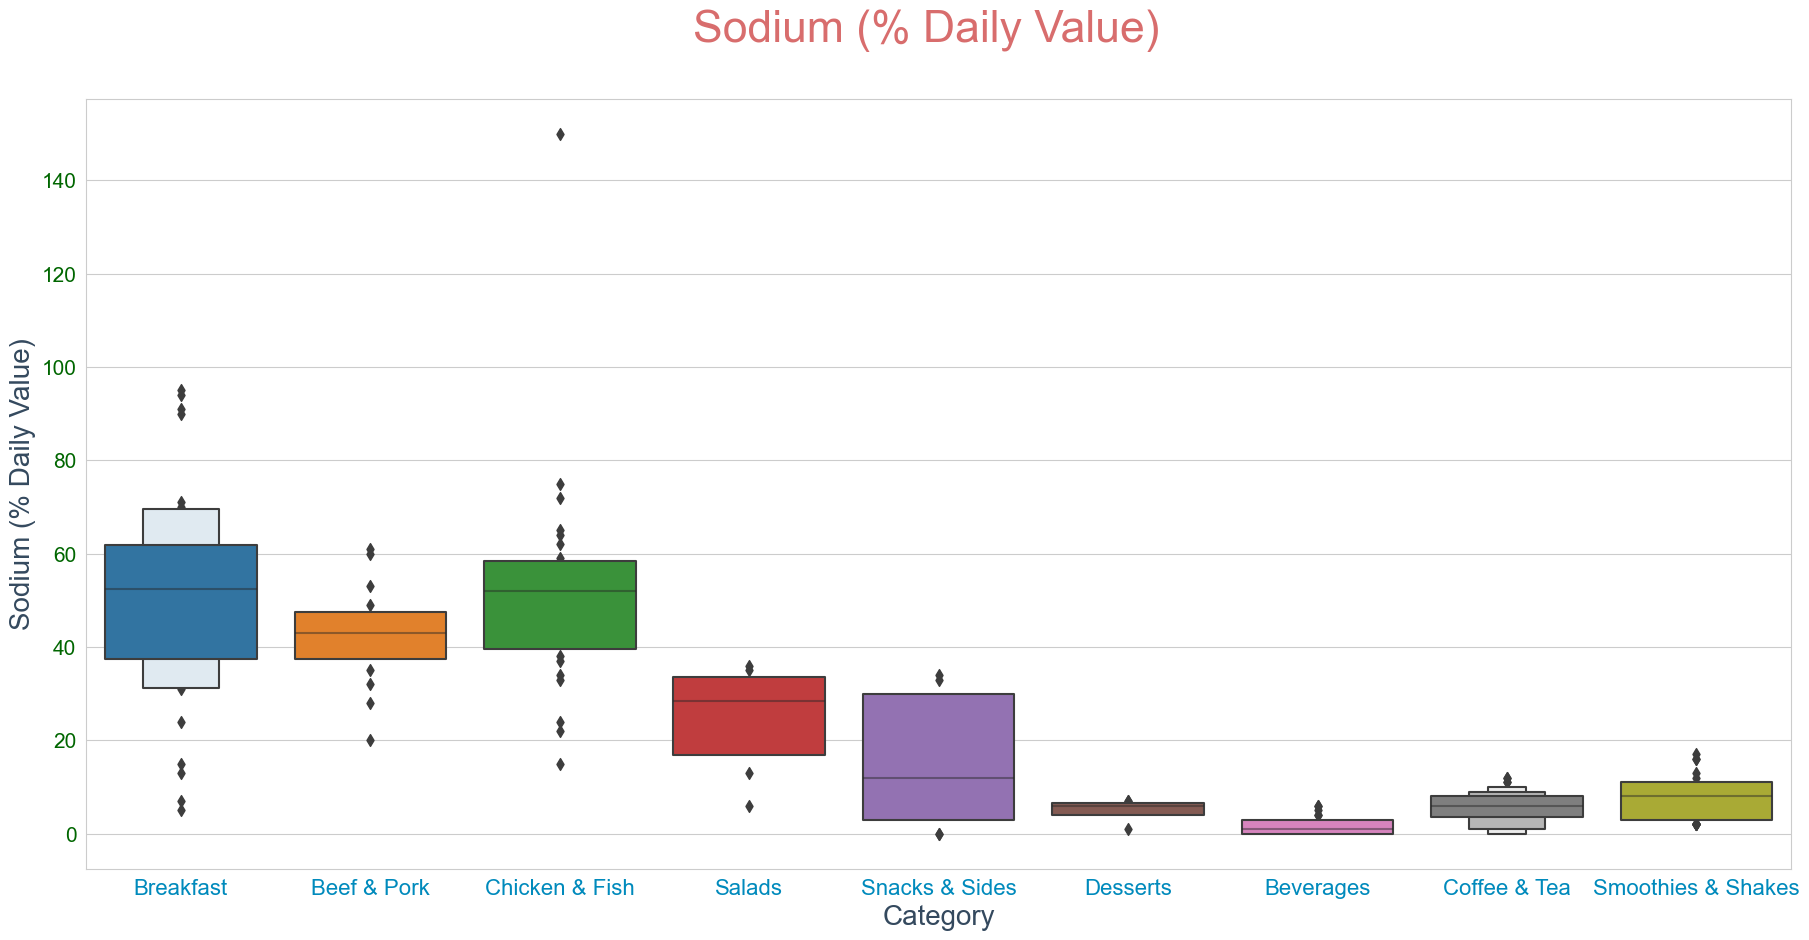

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Sodium (% Daily Value)', data=menu, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Sodium (% Daily Value)  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sodium (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

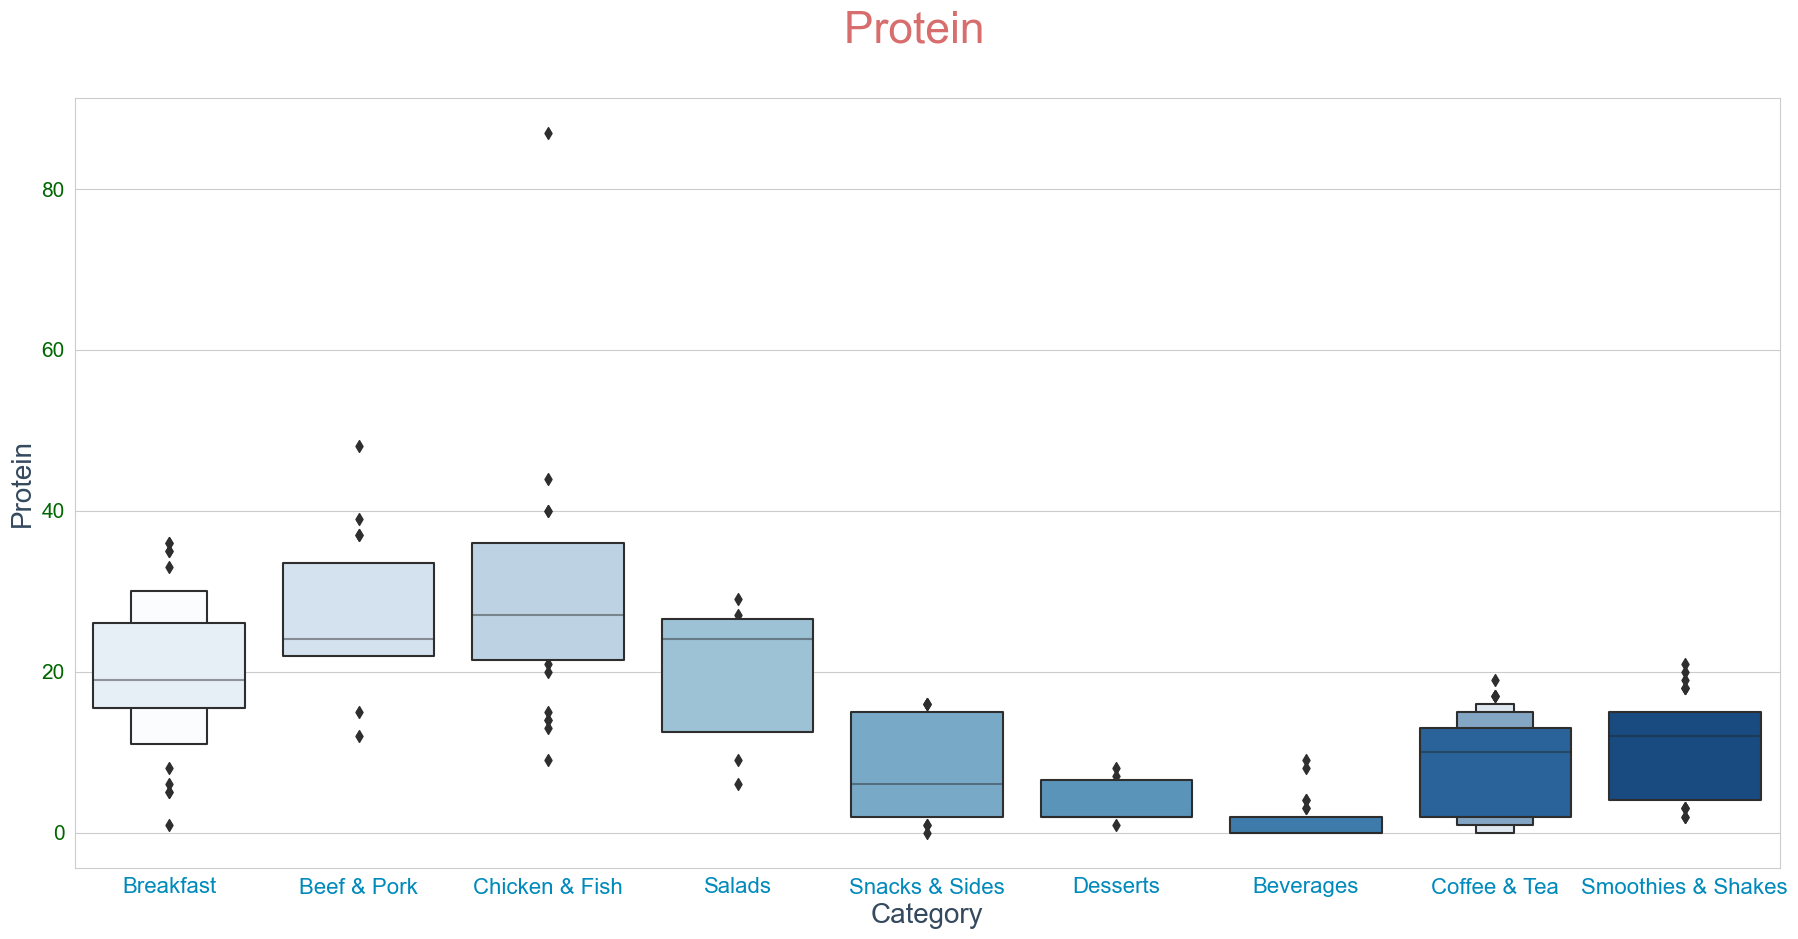

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Protein', data=menu, color='#eeeeee', palette="Blues")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Protein  \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Protein',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

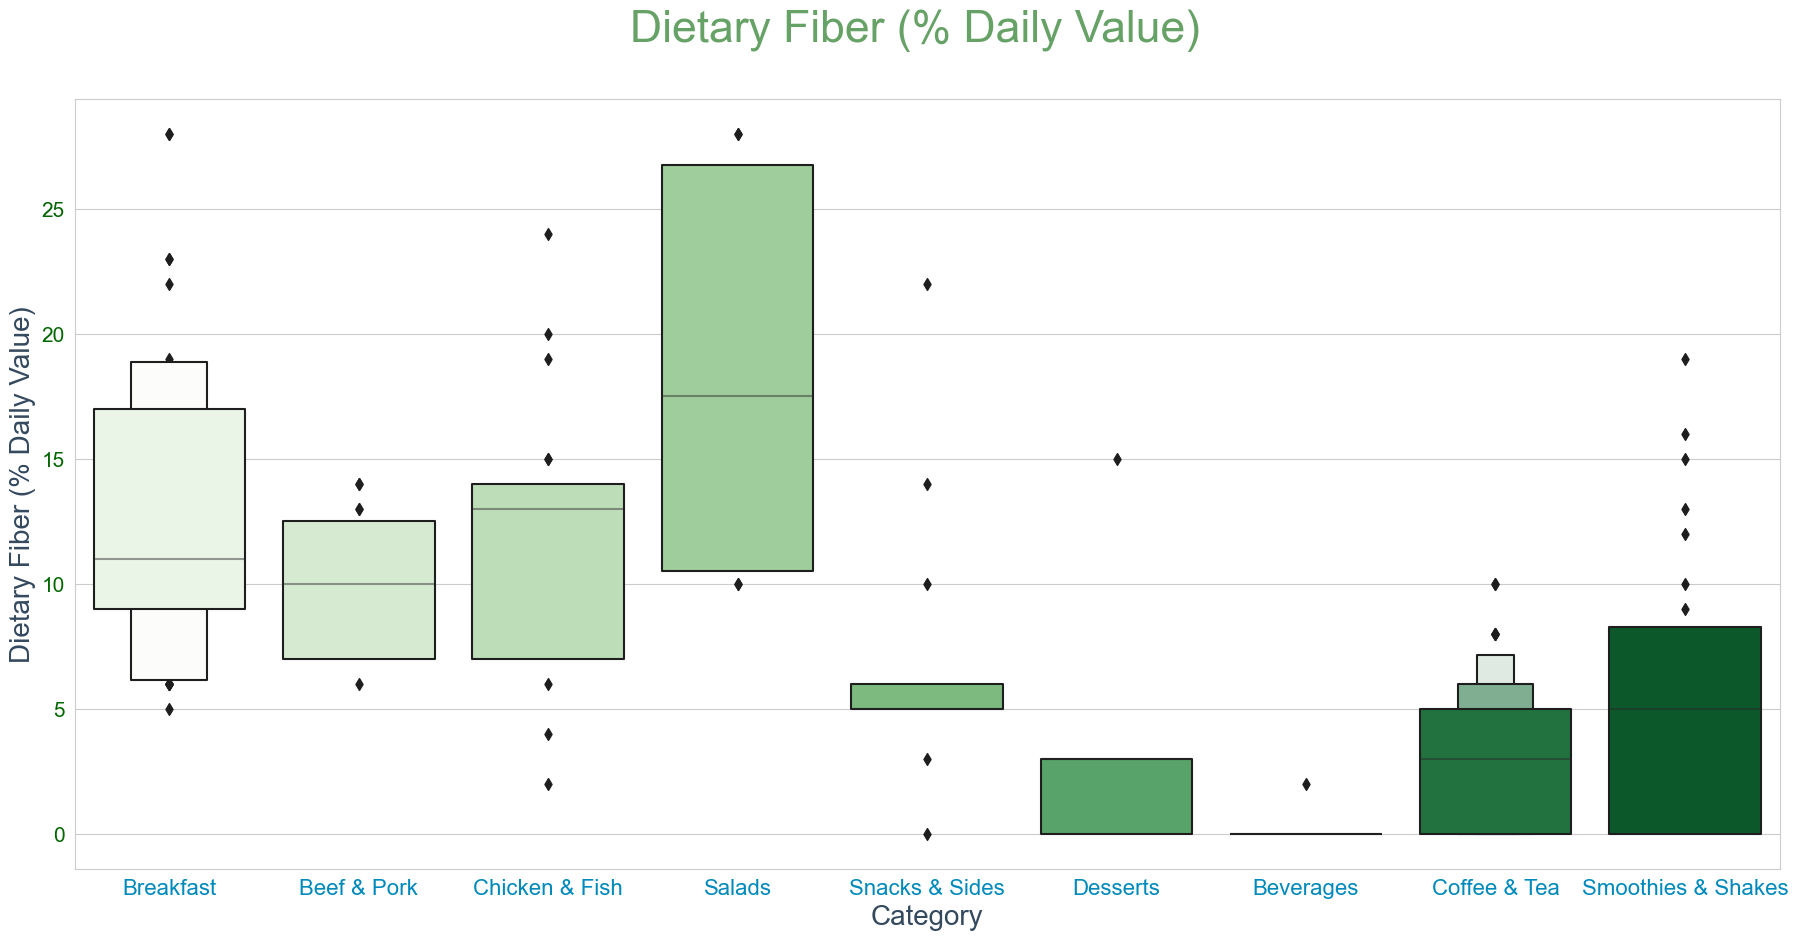

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Dietary Fiber (% Daily Value)', data=menu, color='#eeeeee', palette="Greens")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Dietary Fiber (% Daily Value)  \n", loc="center",size=32,color='darkgreen',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Dietary Fiber (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

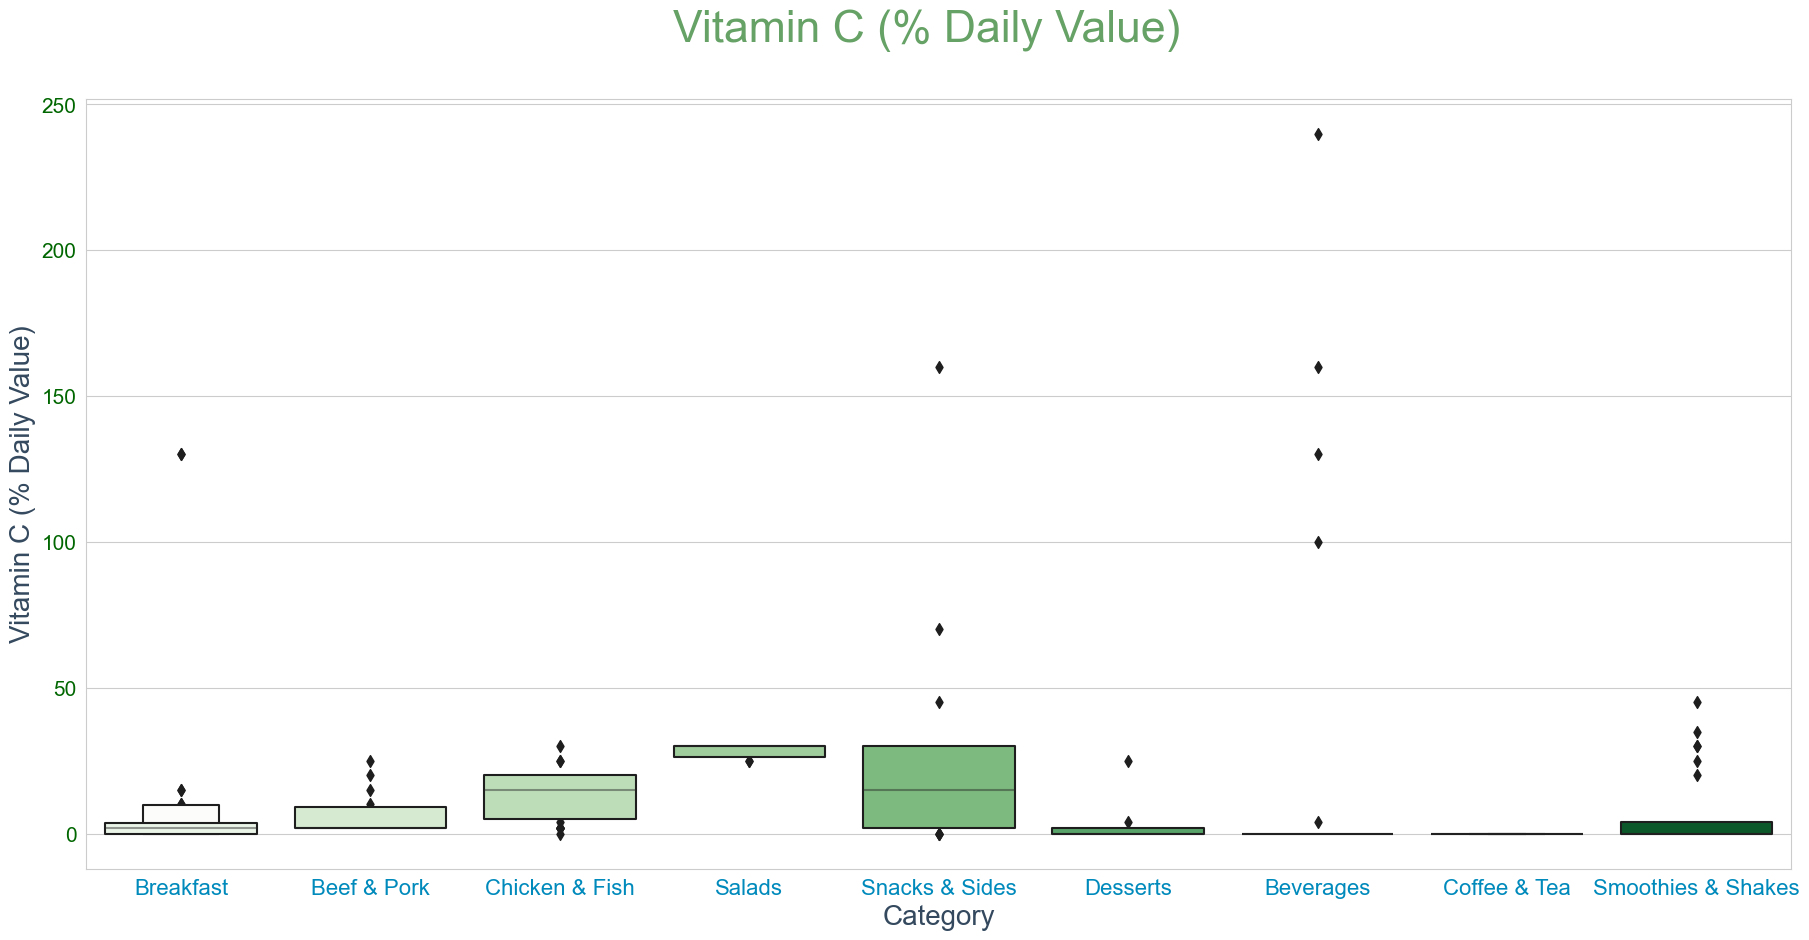

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Vitamin C (% Daily Value)', data=menu, color='#eeeeee', palette="Greens")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Vitamin C (% Daily Value)  \n", loc="center",size=32,color='darkgreen',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Vitamin C (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

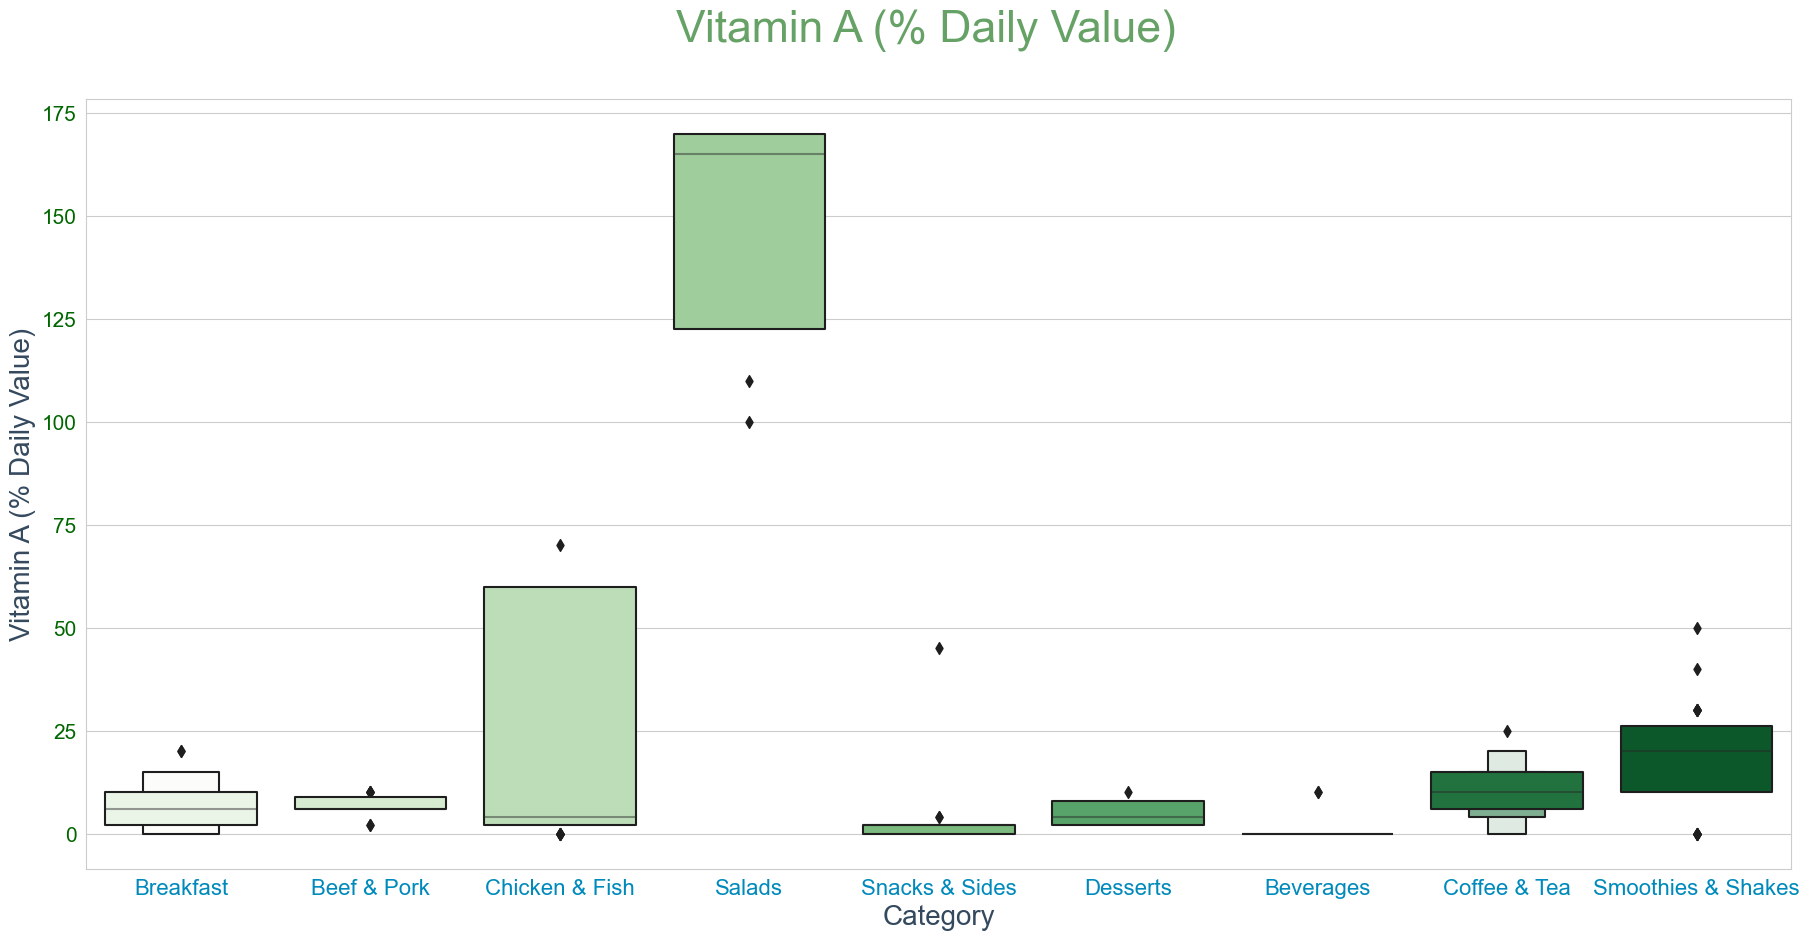

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Vitamin A (% Daily Value)', data=menu, color='#eeeeee', palette="Greens")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Vitamin A (% Daily Value)  \n", loc="center",size=32,color='darkgreen',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Vitamin A (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

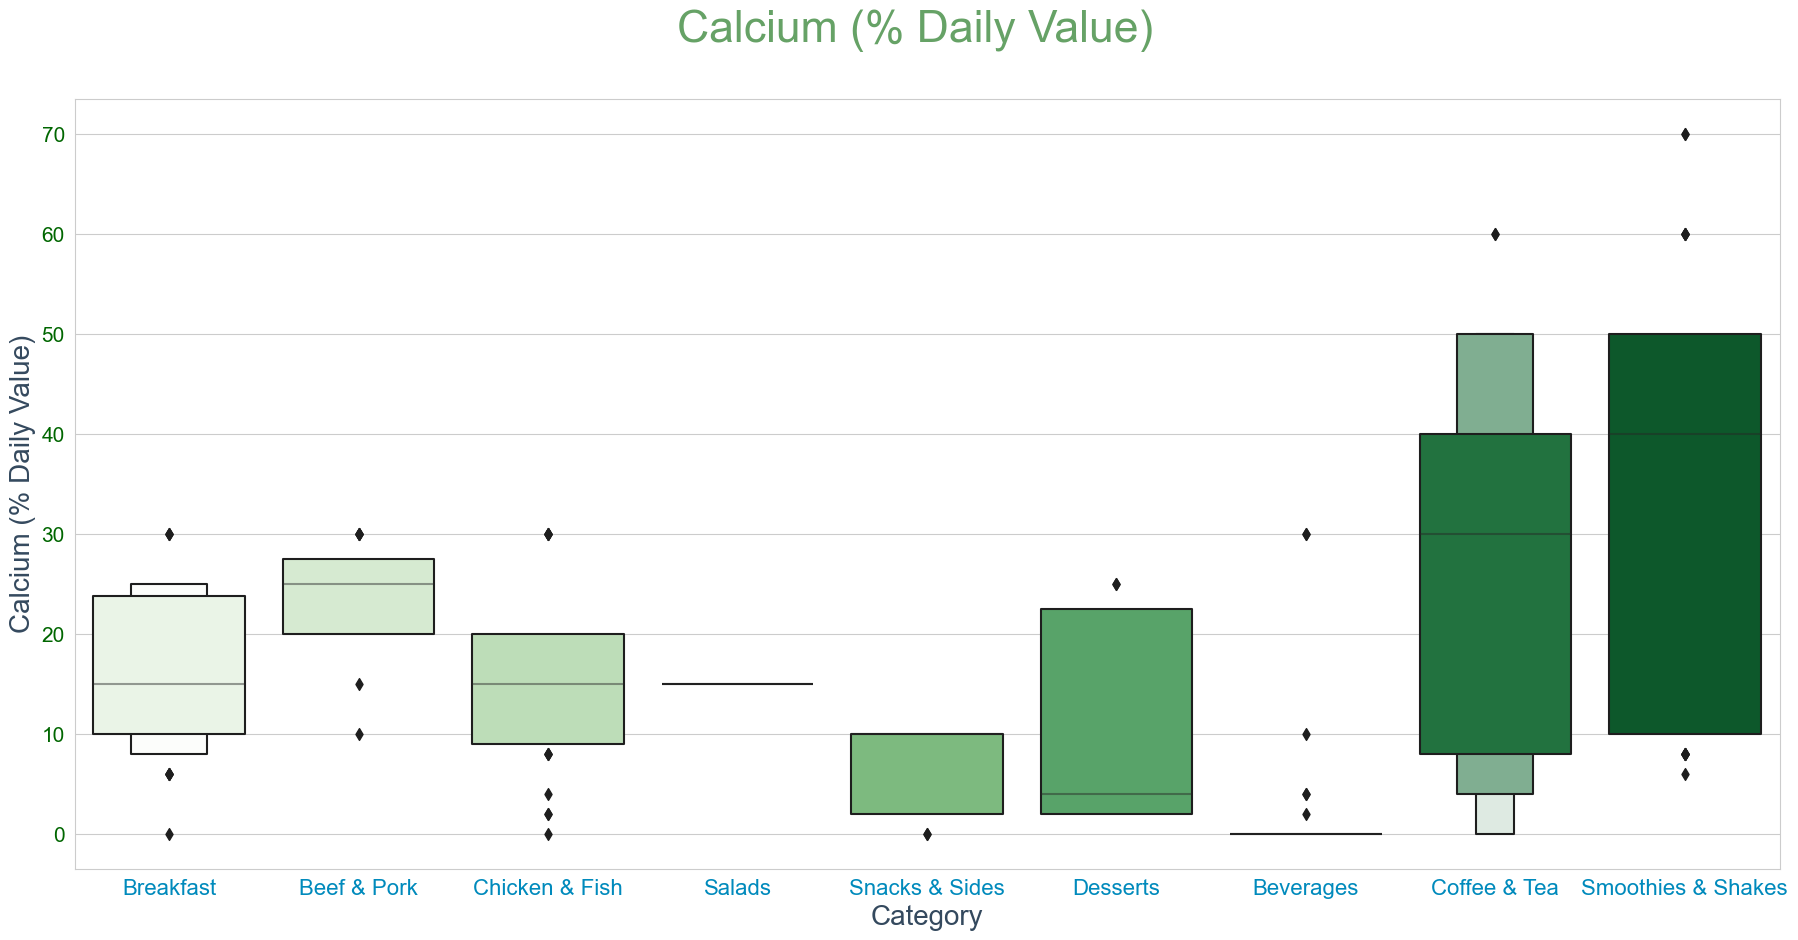

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calcium (% Daily Value)', data=menu, color='#eeeeee', palette="Greens")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Calcium (% Daily Value)  \n", loc="center",size=32,color='darkgreen',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Calcium (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.text(2.5, 1, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
#plt.ylim(0,200)
#plt.legend(loc="upper right",fontsize=14,ncol=5,title='Category',title_fontsize=22,framealpha=0.99)
plt.show()

In [41]:
import plotly.io as pio
from plotly.offline import init_notebook_mode

import plotly.express as px
#df = px.data.menu()
fig = px.scatter(menu, x="Total Fat (% Daily Value)",y='Cholesterol (% Daily Value)', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",
                 template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

In [42]:
fig = px.scatter(menu, x="Carbohydrates (% Daily Value)",y='Sugars', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",
                 template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

In [43]:
fig = px.scatter(menu, x="Carbohydrates (% Daily Value)",y='Protein', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",template="plotly_dark",
                 marginal_x="box",marginal_y="box")
fig.show()

In [44]:
fig = px.scatter(menu, x='Dietary Fiber (% Daily Value)',y='Vitamin C (% Daily Value)', color="Category",
                 size='Calories',  hover_name="Item",
                 trendline="ols",template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

C:\Users\barar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning:

invalid value encountered in double_scalars



In [45]:
fig = px.scatter(menu, x='Protein',y='Sugars', color="Category",size='Calories',
                 hover_name="Item",trendline="ols",template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()